In [ ]:
#%matplotlib notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 8]
import pathlib
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from matminer.featurizers.structure import XRDPowderPattern

from algorithms import pca_algo, kmeans_algo, nmf_algo, tsne_algo
from val_sort import sort_clusterlabels, name_change, plot2d, plot3d, hyperparameter_testing

In [2]:
pathfile = r'C:\Python\Projects\crystal-phase-prediction\data\pkl_files\descriptors\df_xrd_hfo2_del_5_65.pkl'
path = pathlib.WindowsPath(pathfile)
df = pd.read_pickle(path)
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55,xrd_56,xrd_57,xrd_58,xrd_59,xrd_60
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,4.163294e-94,2.126695e-80,8.339854e-68,2.510712e-56,5.802573e-46,1.029507e-36,1.402244e-28,1.466232e-21,...,3.366248e-02,3.330416e-02,1.666865e-02,0.018911,0.010830,0.019990,0.014474,0.021195,2.101365e-02,7.512736e-03
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,1.425278e-93,7.545307e-80,2.999259e-67,8.951811e-56,2.006170e-45,3.375860e-36,4.265411e-28,4.046665e-21,...,1.718201e-02,4.071149e-02,3.064061e-02,0.012806,0.020706,0.025123,0.015981,0.026507,9.700538e-03,6.676516e-04
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,1.247942e-149,1.132106e-127,1.703542e-107,4.251978e-89,1.760362e-72,1.208887e-57,1.377025e-44,2.601783e-33,...,1.726533e-02,7.512397e-03,2.634535e-04,0.014588,0.020729,0.050490,0.045077,0.001179,7.069801e-07,8.044184e-12
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.846123e-17,1.101831e-12,2.117069e-07,0.000534,0.020838,0.044549,0.016139,0.001454,4.465383e-03,1.036061e-03
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,6.262093e-11,1.541005e-07,2.952350e-05,4.403630e-04,5.113673e-04,4.623110e-05,3.253979e-07,1.783095e-10,...,3.055573e-02,3.008895e-02,1.683308e-02,0.019296,0.011096,0.020024,0.017230,0.021155,2.215140e-02,4.816403e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.632147e-19,5.486837e-12,8.420608e-07,0.001336,0.030656,0.041784,0.001556,0.005553,7.398085e-03,1.000607e-04
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,1.652921e-95,1.745521e-81,1.303483e-68,6.883250e-57,2.570331e-46,6.787225e-37,1.267369e-28,1.673483e-21,...,3.985626e-02,2.611494e-02,1.789166e-02,0.012697,0.014278,0.019990,0.015363,0.008371,1.768239e-02,1.197895e-02
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,1.675315e-12,1.191654e-08,5.714564e-06,1.847547e-04,4.027053e-04,5.917777e-05,5.862856e-07,3.915969e-10,...,3.154613e-02,3.551956e-02,2.094031e-02,0.016007,0.020304,0.025104,0.015427,0.013091,6.816907e-03,2.521811e-03
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,2.322144e-157,6.921018e-134,2.349946e-112,9.089770e-93,4.005484e-75,2.010778e-59,1.149954e-45,7.492104e-34,...,2.540069e-03,4.751250e-03,9.841309e-04,0.016372,0.052564,0.031121,0.004288,0.001452,1.540916e-04,2.050562e-07


In [3]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true = labels_true.values

In [30]:
X = df.iloc[:,2:]

In [31]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[5.74143610e-086, 2.90504888e-075, 1.17638033e-064, ...,
        7.34565335e-001, 8.48318769e-001, 4.49184177e-001],
       [1.96554548e-085, 1.03068309e-074, 4.23061267e-064, ...,
        9.18673748e-001, 3.91609667e-001, 3.99186873e-002],
       [1.72098822e-141, 1.54644869e-122, 2.40293517e-104, ...,
        4.08744508e-002, 2.85407115e-005, 4.80959334e-010],
       ...,
       [2.31036093e-004, 1.62778976e-003, 8.06069315e-003, ...,
        4.53707120e-001, 2.75197784e-001, 1.50778340e-001],
       [3.20237785e-149, 9.45405715e-129, 3.31472244e-109, ...,
        5.03211652e-002, 6.22066121e-003, 1.22602506e-005],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.20475969e-001, 1.86818879e-001, 3.72682493e-003]])

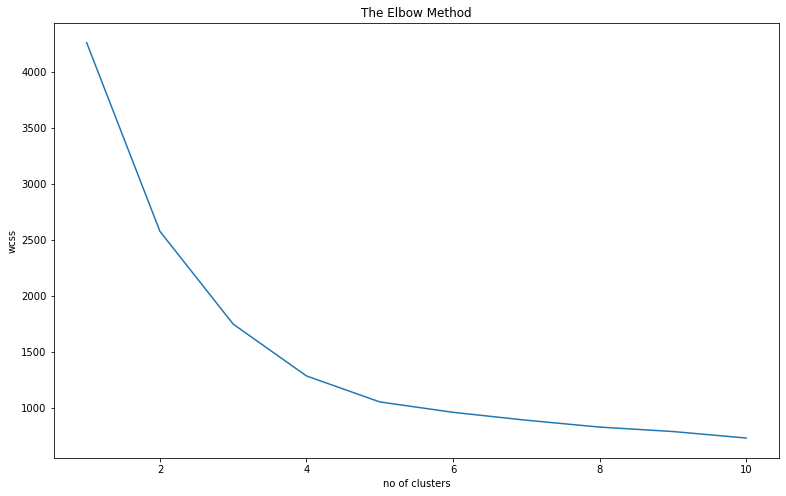

In [32]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [7]:
# PCA Testing

[43.4 62.4 74.  80.3 85.  87.7 89.6 90.7 91.7 92.5 93.2 93.8 94.3 94.8
 95.2 95.6 95.9 96.2 96.5 96.8 97.  97.2 97.4 97.6 97.8 98.  98.2 98.3
 98.4 98.5 98.6 98.7 98.8 98.9 99.  99.1 99.2 99.3 99.4 99.5 99.5 99.5
 99.5 99.5 99.5 99.5 99.5 99.5 99.5 99.5]


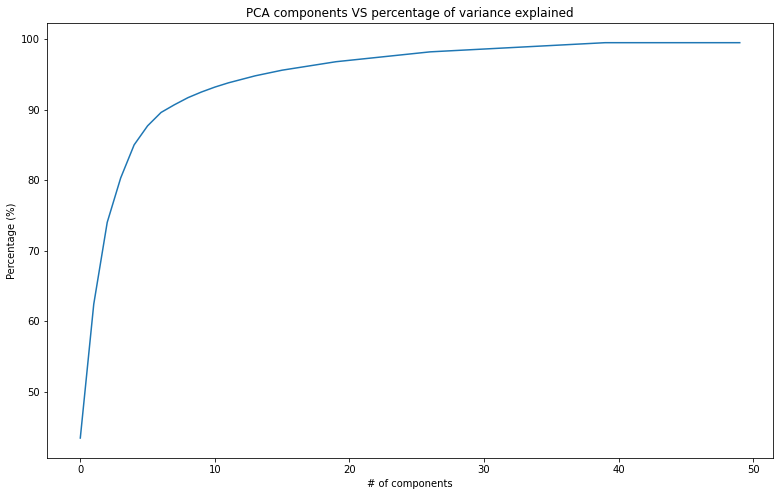

In [8]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
print(variance_ratio)
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [33]:
comp = 15 # change principal components

dfpca = pca_algo(X, comp)
dfpca_kmeans = kmeans_algo(dfpca, 5)

In [34]:
metrics.silhouette_score(dfpca.iloc[:,:-1], dfpca_kmeans['cluster'], metric='l2')

0.534344441562096

In [35]:
dfpca_kmeans['labels'] = labels_true

In [36]:
dfpca_kmeans3 = name_change(dfpca_kmeans)

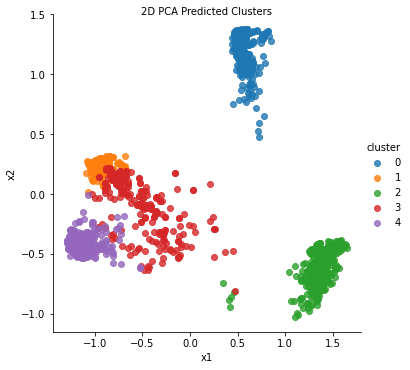

In [37]:
plot2d(dfpca_kmeans3, "2D PCA Predicted Clusters", 'cluster')

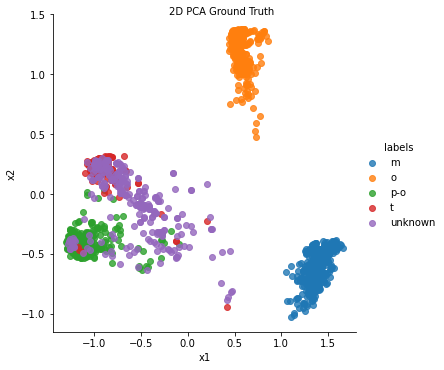

In [38]:
plot2d(dfpca_kmeans3, "2D PCA Ground Truth", 'labels')

In [39]:
plot3d(dfpca_kmeans3, "3D PCA Ground Truth", 'labels')

In [40]:
plot3d(dfpca_kmeans3, "3D PCA Prediction", 'cluster')

In [41]:
dfpca_kmeans = sort_clusterlabels(dfpca_kmeans)
acc = accuracy_score(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])
print(acc)

0.9205797101449276


In [18]:
confusion_matrix(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])

array([[345,   0,   0,   0,   0],
       [  0, 376,   1,   0,  27],
       [  0,   3, 216,   1,  25],
       [  0,   0,   0, 460,   0],
       [  0,  26,  49,   4, 192]], dtype=int64)

In [19]:
comp = list(range(1, 55 , 1)) # here pca comp
hyperparameter_testing(X, 'pca', comp, labels_true)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Round: 40
Round: 41
Round: 42
Round: 43
Round: 44
Round: 45
Round: 46
Round: 47
Round: 48
Round: 49
Round: 50
Round: 51
Round: 52
Round: 53
Round: 54
Best value of performance: 0.9211594202898551 Hyperparameter = 23
Overview: {1: 0.8510144927536232, 2: 0.8979710144927536, 3: 0.9060869565217391, 4: 0.9002898550724637, 5: 0.9159420289855073, 6: 0.9205797101449276, 7: 0.9205797101449276, 8: 0.9205797101449276, 9: 0.9205797101449276, 10: 0.9205797101449276, 11: 0.9205797101449276, 12: 0.9205797101449276, 13: 0.9205797101449276, 14: 0.9205797101449276, 15: 0.9205797101449276, 16: 0.9205797101449276, 17: 0.92057971014

In [ ]:
# TSNE Testing

In [43]:
perplex = 20 # change value here

dftsne = tsne_algo(X, perplex)
dftsne_kmeans = kmeans_algo(dftsne[[0, 1, 2]], n_clusters = 5)

In [44]:
dftsne_kmeans['labels'] = labels_true

In [45]:
metrics.silhouette_score(dftsne, dftsne_kmeans['cluster'], metric='l2')

0.46684718

In [46]:
dftsne_kmeans3 = name_change(dftsne_kmeans)

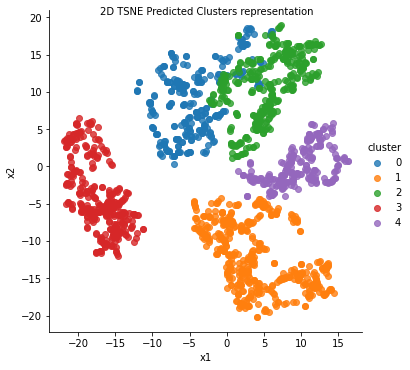

In [47]:
plot2d(dftsne_kmeans3,"2D TSNE Predicted Clusters representation",'cluster')

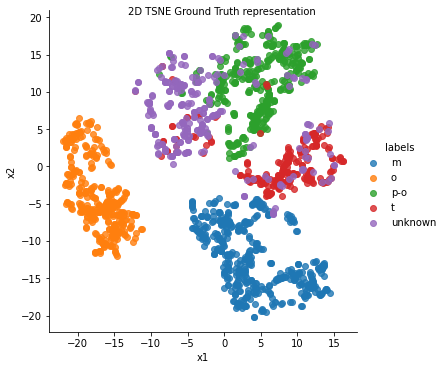

In [48]:
plot2d(dftsne_kmeans3,"2D TSNE Ground Truth representation",'labels')

In [49]:
plot3d(dftsne_kmeans3, 'TSNE 3D Ground Truth', 'labels')

In [50]:
plot3d(dftsne_kmeans3, 'TSNE 3D Prediction', 'cluster')

In [51]:
dftsne_kmeans = sort_clusterlabels(dftsne_kmeans)
acc = accuracy_score(dftsne_kmeans['labels'], dftsne_kmeans['cluster'])
print(acc)

0.904927536231884


In [52]:
confusion_matrix(dftsne_kmeans['labels'], dftsne_kmeans['cluster'])

array([[206,   5,  18,   0,  42],
       [  0, 460,   0,   0,   0],
       [ 64,   0, 340,   0,   0],
       [  0,   0,   0, 345,   0],
       [ 31,   1,   3,   0, 210]], dtype=int64)

In [53]:
#Hyperparameter Testing TSNE

In [54]:
perplexity = list(range(20, 25, 1))
hyperparameter_testing(X,'tsne', perplexity, labels_true)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Best value of performance: 0.9089855072463768 Hyperparameter = 22
Overview: {20: 0.888695652173913, 21: 0.9078260869565218, 22: 0.9089855072463768, 23: 0.8997101449275362, 24: 0.9060869565217391}


In [55]:
# NMF Testing 

In [56]:
component = 8
W_df = nmf_algo(X, component)
W_df_kmeans = kmeans_algo(W_df, 5) # calculate clusterlabels and asign labels to W_df_kmeans 

In [57]:
W_df_kmeans['labels'] = labels_true

In [58]:
metrics.silhouette_score(W_df.iloc[:,:-1], W_df_kmeans['cluster'], metric='l2')

0.7333109053339896

In [59]:
# change names for plotly bib
W_df_kmeans3 = name_change(W_df_kmeans)

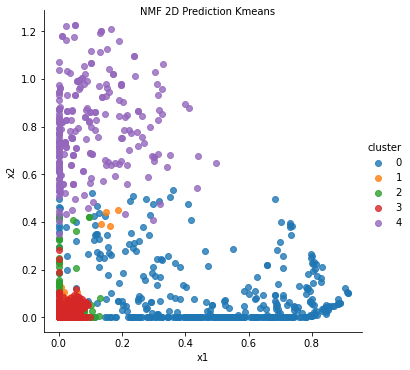

In [66]:
plot2d(W_df_kmeans3,title='NMF 2D Prediction Kmeans', clus_lab = 'cluster' )

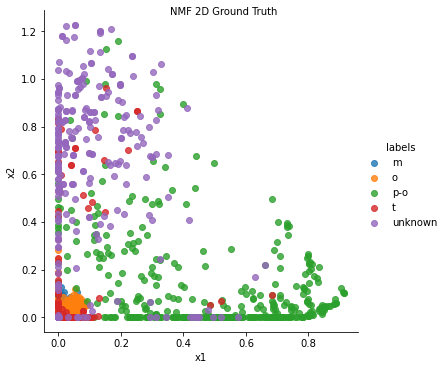

In [67]:
plot2d(W_df_kmeans3,title='NMF 2D Ground Truth', clus_lab = 'labels' )

In [60]:
plot3d(W_df_kmeans3,title='NMF 3D Prediction Kmeans', clus_lab = 'cluster' )

In [61]:
plot3d(W_df_kmeans3,title='NMF 3D Ground Truth', clus_lab = 'labels' )

In [62]:
W_df_kmeans = sort_clusterlabels(W_df_kmeans)
acc = accuracy_score(W_df_kmeans['labels'], W_df_kmeans['cluster'])
print(acc)

0.9252173913043479


In [63]:
confusion_matrix(W_df_kmeans['labels'], W_df_kmeans['cluster'])

array([[382,   0,   0,   0,  22],
       [  0, 460,   0,   0,   0],
       [  3,   1, 214,   0,  27],
       [  0,   0,   0, 345,   0],
       [ 26,   3,  47,   0, 195]], dtype=int64)

In [64]:
# Hyperparameter components testing

In [65]:
components = list(range(2, 10 , 2))
hyperparameter_testing(X,'nmf', components, labels_true)

Round: 1
Round: 2
Round: 3
Round: 4
Best value of performance: 0.9252173913043479 Hyperparameter = 8
Overview: {2: 0.8910144927536232, 4: 0.9020289855072464, 6: 0.9188405797101449, 8: 0.9252173913043479}


In [ ]:
# Testing Alternative Algorithm Methodes OPTICS/DBSCAN

In [ ]:
component = 8
W_df = nmf_algo(X, component)
optics = OPTICS(min_samples=60).fit(W_df)
W_df['cluster'] = optics.labels_
W_df['labels'] = labels_true

In [ ]:
W_df = name_change(W_df)
plot3d(W_df, title='optics 3D Prediction', clus_lab = 'cluster')

In [ ]:
min_samples =list(range(20:30))
hyperparameter_testing(X,'nmf', min_samples, labels_true)